In [ ]:
#20 min of video playback (max brightness) then standby mode

In [48]:
import time
import re
import datetime as pydt
import pandas as pd
import numpy as np
%matplotlib inline

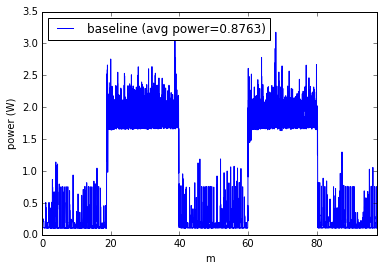

In [49]:
hw_df = pd.read_csv("dlog/dlog_hw_squarewave.csv", error_bad_lines=False) 

# voltage is measured in volts
# current is measured in amperes
hw_df['seconds'] = hw_df.time
hw_df['power'] = hw_df.voltage * hw_df.current
hw_df['hr'] = hw_df.seconds/3600.0
hw_df['m'] = hw_df.seconds/60.0


power_mean = np.mean(hw_df.power)

ax = hw_df.plot(x='m', y='power', label='baseline (avg power=%s)'% round(power_mean,4))

ax.set_ylabel("power (W)")

In [50]:
power_df = hw_df

power_mean1 = 0.160518491976


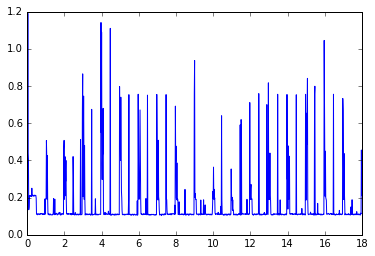

In [51]:
import numpy

x = power_df.m[power_df.m<18]
y = power_df.power[power_df.m<18]
import matplotlib.pyplot as plt
plt.plot(x, y)

power_mean1 = numpy.mean(power_df.power[power_df.m<18])
print "power_mean1 = " + str(power_mean1)

power_mean_video1 = 1.85509560715


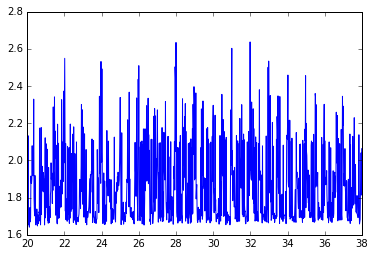

In [52]:
import numpy

x = power_df.m[(power_df.m>20) & (power_df.m<38)]
y = power_df.power[(power_df.m>20) & (power_df.m<38)]
import matplotlib.pyplot as plt
plt.plot(x, y)

power_mean_video1 = numpy.mean(power_df.power[(power_df.m>20) & (power_df.m<38)])
print "power_mean_video1 = " + str(power_mean_video1)

power_mean2 = 0.161756883072


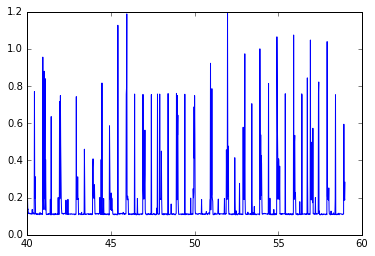

In [53]:
import numpy

x = power_df.m[(power_df.m>40) & (power_df.m<59)]
y = power_df.power[(power_df.m>40) & (power_df.m<59)]
import matplotlib.pyplot as plt
plt.plot(x, y)

power_mean2 = numpy.mean(power_df.power[(power_df.m>40) & (power_df.m<59)])
print "power_mean2 = " + str(power_mean2)

power_mean_video2 = 1.84945434016


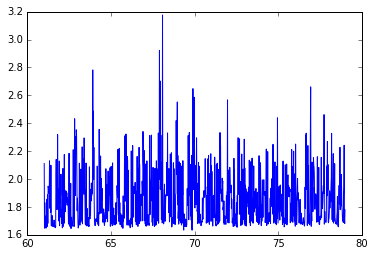

In [54]:
import numpy

x = power_df.m[(power_df.m>61) & (power_df.m<79)]
y = power_df.power[(power_df.m>61) & (power_df.m<79)]
import matplotlib.pyplot as plt
plt.plot(x, y)

power_mean_video2 = numpy.mean(power_df.power[(power_df.m>61) & (power_df.m<79)])
print "power_mean_video2 = " + str(power_mean_video2)

power_mean3 = 0.15607439601


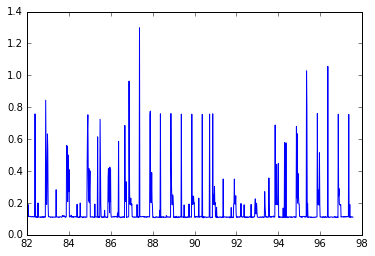

In [55]:
import numpy

x = power_df.m[(power_df.m>82) & (power_df.m<100)]
y = power_df.power[(power_df.m>82) & (power_df.m<100)]
import matplotlib.pyplot as plt
plt.plot(x, y)

power_mean3 = numpy.mean(power_df.power[(power_df.m>82) & (power_df.m<100)])
print "power_mean3 = " + str(power_mean3)

In [63]:
ratio = (power_mean_video1+power_mean_video2)/2/((power_mean1+power_mean2+power_mean3)/3)
print "hw ratio between video/standby = " + str(ratio)

hw ratio between standby / video = 11.6166563824


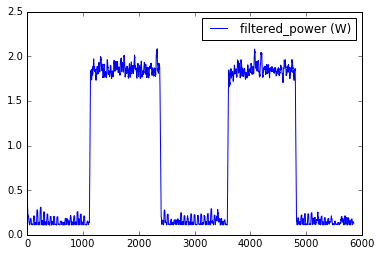

In [39]:
# power data smoothed out by Savitzky–Golay filter from *scipy*  
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

x = power_df.seconds
y = power_df.power
yhat = savgol_filter(y, 21, 1) # window size 51, polynomial order 1
p, = plt.plot(x, yhat, label='filtered_power (W)')
plt.legend(handles=[p])